In [1]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

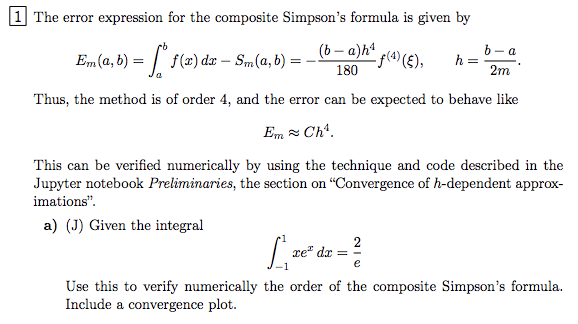

h = 1.00e+00,   S(a,b) = 0.78346746,   e(h) = 4.77e-02
h = 5.00e-01,   S(a,b) = 0.73913060,   e(h) = 3.37e-03
h = 2.50e-01,   S(a,b) = 0.73597650,   e(h) = 2.18e-04
h = 1.25e-01,   S(a,b) = 0.73577259,   e(h) = 1.37e-05
h = 6.25e-02,   S(a,b) = 0.73575974,   e(h) = 8.59e-07
h = 3.12e-02,   S(a,b) = 0.73575894,   e(h) = 5.37e-08
h = 1.56e-02,   S(a,b) = 0.73575889,   e(h) = 3.36e-09
h = 7.81e-03,   S(a,b) = 0.73575888,   e(h) = 2.10e-10
h = 3.91e-03,   S(a,b) = 0.73575888,   e(h) = 1.31e-11
h = 1.95e-03,   S(a,b) = 0.73575888,   e(h) = 8.19e-13

The order p and the error constant C
h = 5.00e-01,  p = 3.95,  C = 0.0522
h = 2.50e-01,  p = 3.99,  C = 0.0548
h = 1.25e-01,  p = 4.00,  C = 0.0558
h = 6.25e-02,  p = 4.00,  C = 0.0562
h = 3.12e-02,  p = 4.00,  C = 0.0563
h = 1.56e-02,  p = 4.00,  C = 0.0563
h = 7.81e-03,  p = 4.00,  C = 0.0563
h = 3.91e-03,  p = 4.00,  C = 0.0564


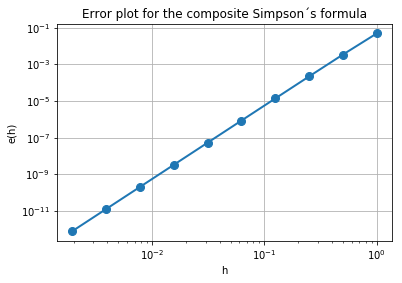

In [2]:
def simpson(f, a, b, m=10):
# Find an approximation to an integral by the composite Simpson's method:
# Input:  
#   f:    integrand
#   a, b: integration interval
#   m:    number of subintervals
# Output: The approximation to the integral
    n = 2*m
    x_noder = linspace(a, b, n+1)       # equidistributed nodes from a to b 
    h = (b-a)/n                         # stepsize
    S1 = f(x_noder[0]) + f(x_noder[n])  # S1 = f(x_0)+f(x_n)
    S2 = sum(f(x_noder[1:n:2]))         # S2 = f(x_1)+f(x_3)+...+f(x_m)
    S3 = sum(f(x_noder[2:n-1:2]))       # S3 = f(x_2)+f(x_4)+...+f(x_{m-1})
    S = h*(S1 + 4*S2 + 2*S3)/3
    return S

# Define the function
def f(x):
    return x*exp(x)

# Integration interval
a, b = -1, 1
exact = 2/exp(1)

# Find an numerical approximation for different values of h.
# Store the stepsize h and the error
n = 1
h = (b-a)/(2*n)
steps = []
errors = []
Nmax = 10
for k in range(Nmax):
    numres = simpson(f, a, b, m=n) # Numerical approximation
    eh = abs(exact - numres)    # Error e(h)
    print('h = {:8.2e},   S(a,b) = {:10.8f},   e(h) = {:8.2e}'.format(h, numres, eh))
    steps.append(h)
    errors.append(eh)
    n = 2*n
    h = (b-a)/(2*n)

print("\nThe order p and the error constant C")
for k in range(1, Nmax-1):
    p = log(errors[k+1]/errors[k])/log(steps[k+1]/steps[k])
    C = errors[k+1]/steps[k+1]**p
    print('h = {:8.2e},  p = {:4.2f},  C = {:6.4f}'.format(steps[k], p, C))

# Make an error plot aka convergence plot for the composite Simpson´s formula
clf()
loglog(steps, errors, 'o-')
xlabel('h')
ylabel('e(h)')
title('Error plot for the composite Simpson´s formula')
grid(True)



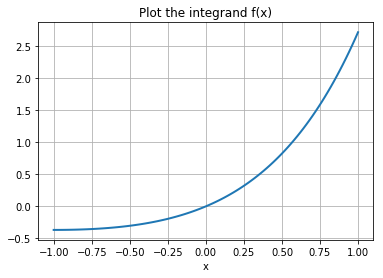

In [3]:
x = linspace(-1, 1, 101)
plot(x, f(x))
title('Plot the integrand f(x)');
xlabel('x');

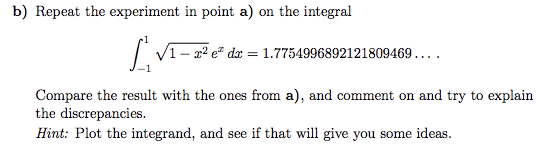

h = 1.00e+00,   S(a,b) = 1.33333333,   e(h) = 4.42e-01
h = 5.00e-01,   S(a,b) = 1.63540364,   e(h) = 1.40e-01
h = 2.50e-01,   S(a,b) = 1.72886020,   e(h) = 4.66e-02
h = 1.25e-01,   S(a,b) = 1.75945841,   e(h) = 1.60e-02
h = 6.25e-02,   S(a,b) = 1.76989907,   e(h) = 5.60e-03
h = 3.12e-02,   S(a,b) = 1.77353123,   e(h) = 1.97e-03
h = 1.56e-02,   S(a,b) = 1.77480571,   e(h) = 6.94e-04
h = 7.81e-03,   S(a,b) = 1.77525467,   e(h) = 2.45e-04
h = 3.91e-03,   S(a,b) = 1.77541312,   e(h) = 8.66e-05
h = 1.95e-03,   S(a,b) = 1.77546909,   e(h) = 3.06e-05

The order p and the error constant C
h = 5.00e-01,  p = 1.59,  C = 0.4208
h = 2.50e-01,  p = 1.54,  C = 0.3943
h = 1.25e-01,  p = 1.52,  C = 0.3769
h = 6.25e-02,  p = 1.51,  C = 0.3670
h = 3.12e-02,  p = 1.50,  C = 0.3614
h = 1.56e-02,  p = 1.50,  C = 0.3583
h = 7.81e-03,  p = 1.50,  C = 0.3565
h = 3.91e-03,  p = 1.50,  C = 0.3556


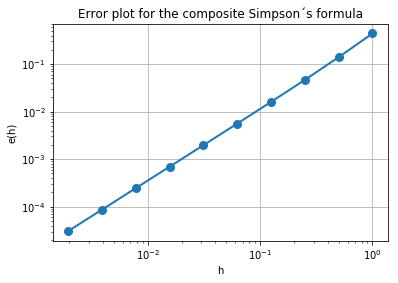

In [4]:
# Define a the new function
def g(x):
    return sqrt(1-x**2)*exp(x)

# Integration interval
a, b = -1, 1
exact = 1.7754996892121809469

# Find an numerical approximation for different values of h.
# Store the stepsize h and the error
n = 1
h = (b-a)/(2*n)
steps = []
errors = []
Nmax = 10
for k in range(Nmax):
    numres = simpson(g, a, b, m=n) # Numerical approximation
    eh = abs(exact - numres)    # Error e(h)
    print('h = {:8.2e},   S(a,b) = {:10.8f},   e(h) = {:8.2e}'.format(h, numres, eh))
    steps.append(h)
    errors.append(eh)
    n = 2*n
    h = (b-a)/(2*n)

print("\nThe order p and the error constant C")
for k in range(1, Nmax-1):
    p = log(errors[k+1]/errors[k])/log(steps[k+1]/steps[k])
    C = errors[k+1]/steps[k+1]**p
    print('h = {:8.2e},  p = {:4.2f},  C = {:6.4f}'.format(steps[k], p, C))

# Make an error plot aka convergence plot for the composite Simpson´s formula
clf()
loglog(steps, errors, 'o-')
xlabel('h')
ylabel('e(h)')
title('Error plot for the composite Simpson´s formula')
grid(True)




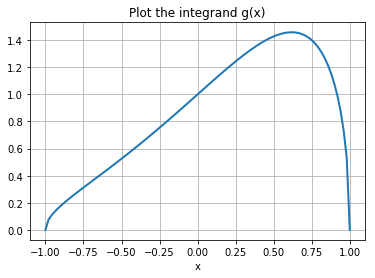

In [5]:
x = linspace(-1, 1, 101)
plot(x, g(x))
title('Plot the integrand g(x)');
xlabel('x');

For comparison we see that the fixed point iterations fo g converges slower than for f.